<h1 style="font-size:32px; text-align:center;">Predicting Mental Illness Treatment Behavior</h1>
<hr>
<h1 style="font-size:18px; text-align:center; margin-bottom:24px;">Zachary Christy, Carl Lejerskar, Samad Patel</h1>
<hr>

# Part One: Context

The purpose of this report is to explore the qualities that are predictive in whether or not an individual will seek mental health treatment. Mental health is an exceptionally important aspect of life, and it's something not discussed enough. Understanding the relationships between an individual and their workplace can be beneficial in fostering healhier, more fulfilling lives, and on the business end, more productive employees. 

In [328]:
# Load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
# We'll use the fivethirtyeight style for the entire report. 
style.use('fivethirtyeight')

# Load the data
df = pd.read_csv('MentalHealthSurvey.csv')
print(df.shape)
df.head()

(1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


The data has the following variables: 

In [329]:
print(df.columns.values)

['Timestamp' 'Age' 'Gender' 'Country' 'state' 'self_employed'
 'family_history' 'treatment' 'work_interfere' 'no_employees' 'remote_work'
 'tech_company' 'benefits' 'care_options' 'wellness_program' 'seek_help'
 'anonymity' 'leave' 'mental_health_consequence' 'phys_health_consequence'
 'coworkers' 'supervisor' 'mental_health_interview' 'phys_health_interview'
 'mental_vs_physical' 'obs_consequence' 'comments']


This dataset is from a 2014 survey that measures attitudes towards mental health and the frequency of mental health disorders in the workplace all across the world. It was collected by Open Sourcing Mental Illness, a nonprofit organization dedicated to raising awareness, educating, and providing resources to support mental wellness in tech communities. 

The data was collected by surveying anonymous tech employees. The anonymity of this survey inclines us to believe that the contents are truthful and reliable, as the respondents wouldn't have any reason to answer untruthfully. 

# Part Two: Exploratory Data Analysis

We will break this down into three parts: Cleaning the data, visualizing the cleaned data, and engineering new features based on insights we draw. Part of cleaning the data requires some visualization, so there may be overlap, and some of the data may be changed after generating insights from the graphs, but for clarity we will try and keep the three parts separate. 

Step 1: Data Cleanup

Step 2: Data Visualization 

Step 3: Feature Engineering

## Step 1. Data Cleanup

In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [331]:
np.sum(df.isnull())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

It's apparent that we have a fair amount of missing data to deal with. Let's take variables one by one to make sure they're in proper shape. 

### 1.1 - Age

In [332]:
# Determine if there are any unsual ages 
print(min(df.Age))
print(max(df.Age))
print(df.Age[df.Age<=0].values)
print(df.Age[df.Age<18].values)

# Fix the -29
df.loc[143,'Age'] = 29

# Remove rows with the odd ages 
df = df.loc[-df.Age.isin([-1, -1726, 5, 8, 11, 329, 99999999999]), :]

-1726
99999999999
[  -29 -1726    -1]
[  -29 -1726     5     8    11    -1]


We'll confirm now that the age looks proper: 

In [333]:
print(np.sort(df.Age.unique()))

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 53 54 55 56 57 58 60 61 62 65 72]


### 1.2  - Gender

Gender is very messy, and not coded properly at all. We will code for three genders: Male, Female, Trans. 

In [334]:
df.Gender.replace(to_replace=["M", "male", "m", "Male-ish", "maile", "Mal", "Male (CIS)", "Make", 
                              "Male ", "Man","msle", "Mail", "Malr","Cis Man", "Cis Male", "cis male"], 
                 value='Male', 
                 inplace = True)
df.Gender.replace(to_replace = ["Trans-female", "something kinda male?", "queer/she/they", 
                                "non-binary","Nah", "all", "Enby", "fluid", "Genderqueer", 
                                "Androgyne", "Agender", "male leaning androgynous", "Guy (-ish) ^_^", 
                                "Trans woman", "Neuter", "Female (trans)", "queer", 
                                "ostensibly male, unsure what that really means"], 
                 value = 'Trans', 
                 inplace = True)
df.Gender.replace(to_replace=["Cis Female", "F", 'f', 'woman', "female", "Woman",  "Femake", "Female ",
                              "cis-female/femme", "Female (cis)", "femail"], 
                 value = 'Female', 
                 inplace = True)
df.Gender.unique()

array(['Female', 'Male', 'Trans'], dtype=object)

### 1.3 - Country
    
There are a lot of classes. We'll need to recode sparse classes. 

In [335]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina', 'Hungary',
       'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway', 'Thailand',
       'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

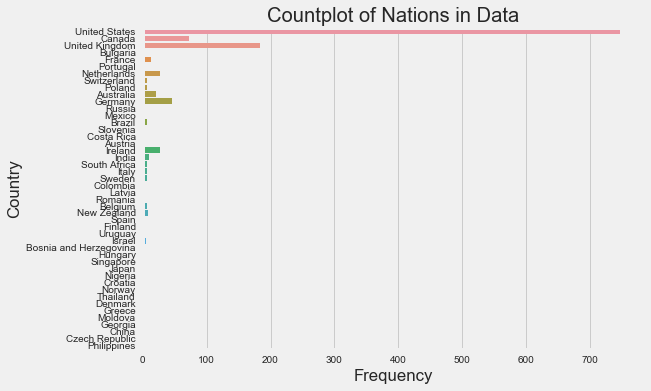

In [336]:
sns.countplot(y=df.Country)
plt.title('Countplot of Nations in Data')
plt.xlabel('Frequency')
plt.show()

We'll make four categories - United States, United Kingdom, Canada, Other

In [337]:
df.Country.replace(to_replace = ['Germany','Mexico','Australia','New Zealand','Czech Republic','Denmark', 
                                 'Greece', 'Moldova','Croatia', 'Norway','Bosnia and Herzegovina','Finland',
                                 'Spain','Latvia', 'Romania', 'Belgium','Italy', 'Sweden','Austria', 'Ireland', 
                                 'Bulgaria', 'France','Portugal', 'Netherlands', 'Switzerland', 'Poland',
                                 'Georgia','Philippines','China','Thailand','Hungary', 'Singapore', 'Japan',
                                 'India','Israel','Costa Rica','Brazil','Colombia','South Africa','Nigeria'],
                  value = 'Other',
                  inplace = True)
df.Country.replace(to_replace=['Russia', 'Slovenia','Uruguay','Georgia'], value = 'Other', inplace = True)

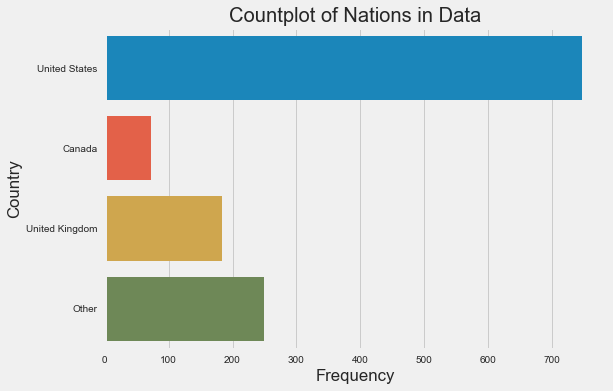

In [338]:
sns.countplot(y=df.Country)
plt.title('Countplot of Nations in Data')
plt.xlabel('Frequency')
plt.show()

Canada appears pretty sparse, but we'll leave it - the important distinction here is that Canada has distinctly different health care than many of the nations in "Other", and the US. 

Truthfully, the best way to recode these variables would be by grouping different nations into categories based on their healthcare systems, but that would be quite tedious. We'll settle for what we have, here. 

### 1.4 - Comments

We'll recode commments - 1 for a comment left, 0 for no comment left. Those who leave a comment are more likely to feel passionate about mental health, or have a story to tell about their own mental health struggles. This may mean they are also more inclined to seek treatment, which could be a helpful predictor. 

In [339]:
df.loc[df.comments.notnull(), 'comments'] = 1
df.loc[df.comments != 1, 'comments'] = 0
print(df.comments.unique())
df.comments=df.comments.astype(int)


[0 1]


In [340]:
df.comments.unique()

array([0, 1])

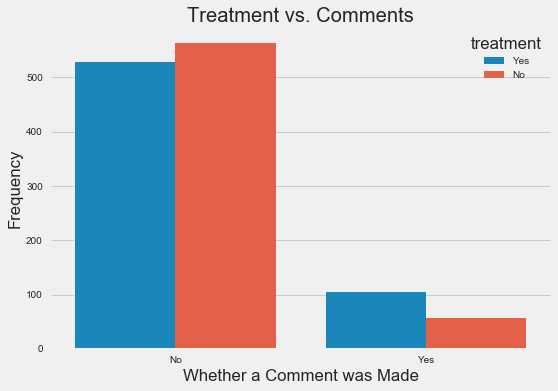

In [341]:
sns.countplot(df.comments, hue = df.treatment)
plt.title('Treatment vs. Comments')
plt.xlabel('Whether a Comment was Made')
plt.ylabel('Frequency')
plt.xticks((0, 1), ('No', 'Yes'))
plt.show()

### 1.5 - Work Interfere

This is a variable about whether or not an individual believes their mental health interferes with their work. 

There are a lot of missing values, so it would be helpful to know how their responses are distributed. 

In [342]:
print(df.work_interfere.unique())
print(df.work_interfere.value_counts())

['Often' 'Rarely' 'Never' 'Sometimes' nan]
Sometimes    464
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64


Some people declined to answer. This could either be because they believe it does significantly interfere with their work, and are afraid to answer as such, or it doesn't effect them very much at all so they didn't care to answer. 
    
It makes sense that an individual whose mental health often interferes with their work is more likely to seek treatment. So we can determine which category makes sense to impute with based on how often treatment appears in each category. 

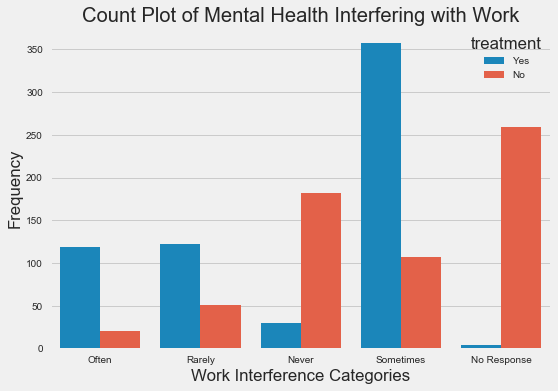

In [343]:
df.loc[df.work_interfere.isnull(), 'work_interfere'] = 'No Response'
style.use('fivethirtyeight')
sns.countplot(x=df.work_interfere, hue = df.treatment)
plt.title('Count Plot of Mental Health Interfering with Work')
plt.ylabel('Frequency')
plt.xlabel('Work Interference Categories')
plt.show()

Individuals who didn't respond overwhelmingly didn't seek any treatment, just as the "Never" category overwhelmingly doesn't seek treatment. So we will impute these as "Never". 

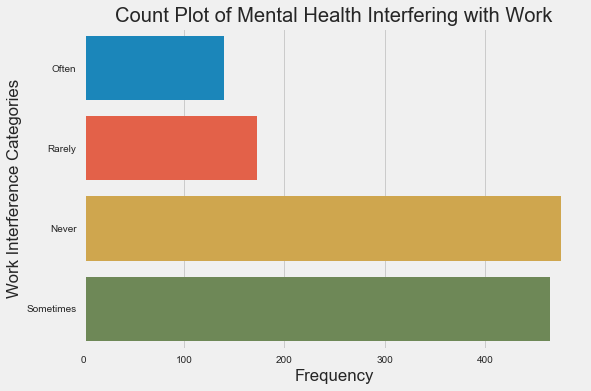

In [344]:
df.loc[df.work_interfere=='No Response', 'work_interfere'] = 'Never'
sns.countplot(y=df.work_interfere)
plt.title('Count Plot of Mental Health Interfering with Work')
plt.xlabel('Frequency')
plt.ylabel('Work Interference Categories')
plt.show()

### 1.7 - Self-Employed Status
As noted above, there are 18 values that are missing for self-employed. Perhaps information from the other variables can give us insight as to whether or not they are self-employed. 

In [345]:
df.loc[df.self_employed.isnull(), :]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,0
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,0
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,0
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,0
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,0
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,0
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,0
7,2014-08-27 11:32:05,39,Male,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,0
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,0
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,0


We'll make an assumption here that more than 6 employees means they're not self-employed. Of course, it's possible that these individuals are the employers, but we'll maintain the assumption. 

It so happens that the majority of these observations can talk to some of their supervisors about their mental health, so that verifies they are not self-employed as well. 

In [346]:
df.loc[(df.self_employed.isnull()) & (df.no_employees!='1-5'), 'self_employed'] = 'No'

Now we'll say that anyone with 1-5 employees in their company who can talk to their coworkers about their mental health is not self-employed, because that indicates they have coworkers to begin with, and thus are not self-employed (since we're maintaining the assumption above.

We'll indicate the remaining observations as self-employed. 

In [347]:
df.loc[(df.self_employed.isnull()) & (df.coworkers !='No') , 'self_employed'] = 'No'
df.loc[(df.self_employed.isnull()) & (df.coworkers =='No') , 'self_employed'] = 'Yes'

In [348]:
np.sum(df.self_employed.isnull())

0

The above code confirms that we've dealt with the NA values in this column. 

### 1.8 - State

We will drop this column. There are far too many missing values due to the fact that not everyone who took this survey lives in the United States, so it serves no purpose. This means we will have 27 columns. 

In [349]:
df.drop('state', axis = 'columns', inplace=True)
print(df.shape)

(1252, 26)


### 1.9 - Remaining Variables

We no longer have NA values to deal with. All that's left is to check the unique values of every other variable to confirm that there are no unusual classes. 

In [350]:
# Confirm no other missing values
np.sum(df.isnull())

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64

In [351]:
relevant_columns = df.columns.values
for i in ['Timestamp', 'Age', 'Gender', 'Country', 'self_employed', 'work_interfere', 'Hour', 'comments']:
    relevant_columns = relevant_columns[relevant_columns!=i]
print(relevant_columns)

['family_history' 'treatment' 'no_employees' 'remote_work' 'tech_company'
 'benefits' 'care_options' 'wellness_program' 'seek_help' 'anonymity'
 'leave' 'mental_health_consequence' 'phys_health_consequence' 'coworkers'
 'supervisor' 'mental_health_interview' 'phys_health_interview'
 'mental_vs_physical' 'obs_consequence']


In [352]:
for column in relevant_columns:
    print(df[column].unique())

['No' 'Yes']
['Yes' 'No']
['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
['No' 'Yes']
['Yes' 'No']
['Yes' "Don't know" 'No']
['Not sure' 'No' 'Yes']
['No' "Don't know" 'Yes']
['Yes' "Don't know" 'No']
['Yes' "Don't know" 'No']
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
['No' 'Maybe' 'Yes']
['No' 'Yes' 'Maybe']
['Some of them' 'No' 'Yes']
['Yes' 'No' 'Some of them']
['No' 'Yes' 'Maybe']
['Maybe' 'No' 'Yes']
['Yes' "Don't know" 'No']
['No' 'Yes']


Everything looks clean. It's time to conduct some visualizations to see if we can draw any additional insights. 

## Step 2. Data Visualization

Since we are fundamentally exploring whether or not individuals sought treatment, we ought to check these frequencies. 

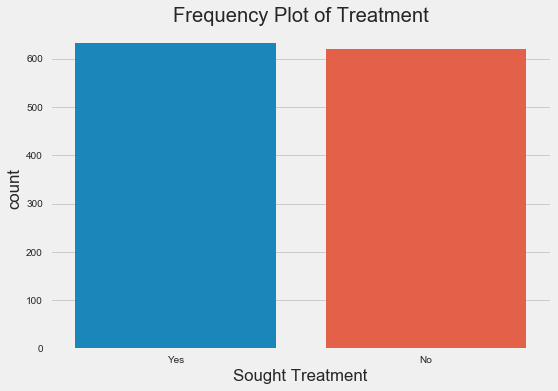

In [353]:
sns.countplot(df.treatment)
plt.title('Frequency Plot of Treatment')
plt.xlabel('Sought Treatment')
plt.show()

Whether or not individuals sought treatment is about equal in this dataset. 

### 2.2 - Age

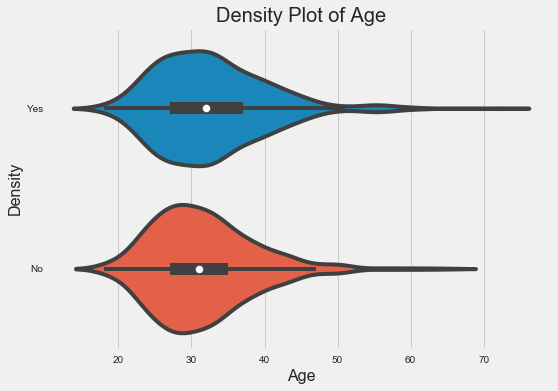

In [354]:
sns.violinplot(x = 'Age', y = 'treatment', data = df)
plt.title('Density Plot of Age', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('Age', fontsize = 16)
plt.show()


They appear to have similar distributions. 

### 2.3 - Comments, Gender, Family History, Remote Work

For ease of readability, we'll include all these variables on one plot. 

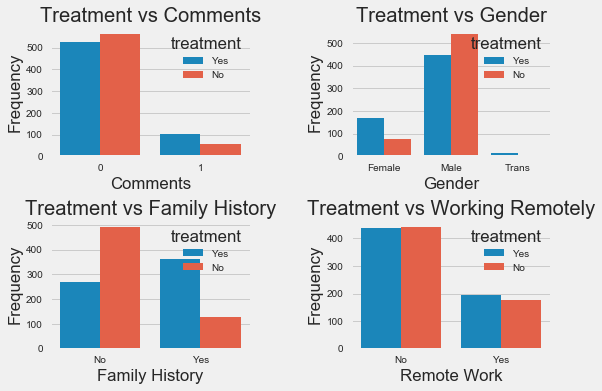

In [355]:
plt.subplot(2,2,1)
sns.countplot(df.comments, hue = df.treatment)
plt.title('Treatment vs Comments')
plt.xlabel('Comments')
plt.ylabel('Frequency')
plt.subplot(2,2,2)
sns.countplot(df.Gender, hue = df.treatment)
plt.title('Treatment vs Gender')
plt.ylabel('Frequency')
plt.subplot(2,2,3)
sns.countplot(df.family_history, hue = df.treatment)
plt.title('Treatment vs Family History')
plt.ylabel('Frequency')
plt.xlabel('Family History')
plt.subplot(2,2,4)
sns.countplot(df.remote_work, hue = df.treatment)
plt.title('Treatment vs Working Remotely')
plt.ylabel('Frequency')
plt.xlabel('Remote Work')
plt.subplots_adjust(hspace=.5, wspace = .5)
plt.show()


We observe that there are relationships between each variable and treatment with the exception of remote work. This is good visual evidence that remote work is an unimportant variable, so we will remove it. 

Those with a family history are more likely to seek treatment, as are females and transgenders. Males make up the vast majority of respondents, yet mostly do not seek treatment. 

In [356]:
# Removing remote work
df.drop('remote_work', axis = 1, inplace=True)

### 2.4 - mental_health_consequence, phys_health_consequence

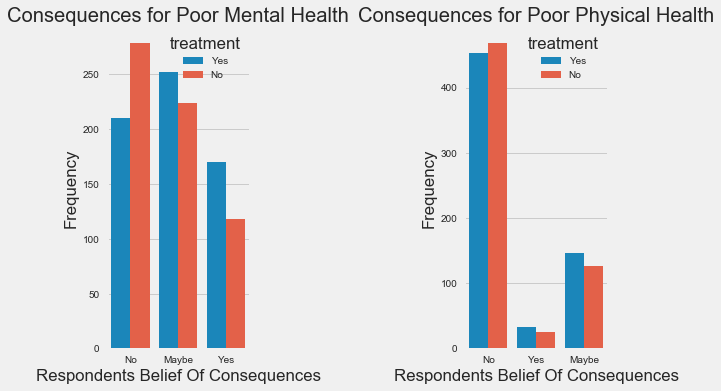

In [357]:
plt.subplot(1,2,1)
sns.countplot(df.mental_health_consequence, hue = df.treatment)
plt.title('Consequences for Poor Mental Health')
plt.xlabel('Respondents Belief Of Consequences')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
sns.countplot(df.phys_health_consequence, hue = df.treatment)
plt.title('Consequences for Poor Physical Health')
plt.ylabel('Frequency')
plt.xlabel('Respondents Belief Of Consequences')
plt.subplots_adjust(wspace = 1.5)
plt.show()

These plots demonstrate that one's perception of one's workplace does not drastically affect their inclination to seek treatment, but there still is some relationship. 

### 2.5: care_options

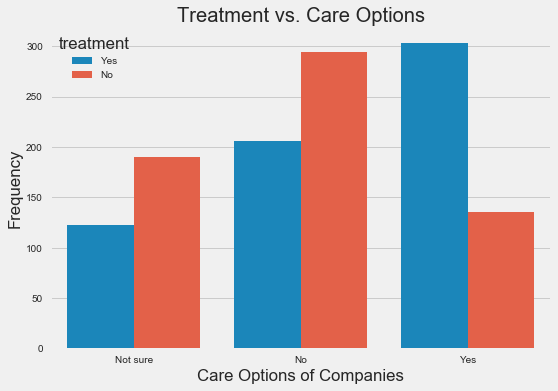

In [358]:
sns.countplot(df.care_options, hue = df.treatment)
plt.title('Treatment vs. Care Options')
plt.ylabel('Frequency')
plt.xlabel('Care Options of Companies')
plt.show()

Employees whose companies provide mental health care options seek treatment far more, on average. Surprisingly, employees whose companies don't provide care options seek treatment more on average than employees of companies who don't provide care options at all. 

## Step 3. Feature Engineering

### 3.1 - "MoreLikely" 

An individual who has a family history of mental health issues and whose mental health problems affect their work is more likely to seek treatment. So we will code them as "More Likely" to seek treatment. 

In [359]:
df.loc[(df['family_history']=='Yes') & (df['work_interfere'].isin(['Often','Rarely','Sometimes'])),'MoreLikely'] = 1
df.loc[df.MoreLikely != 1, 'MoreLikely'] = 0
# Confirm that it's coded properly. 
print(df.MoreLikely.unique())

[ 0.  1.]


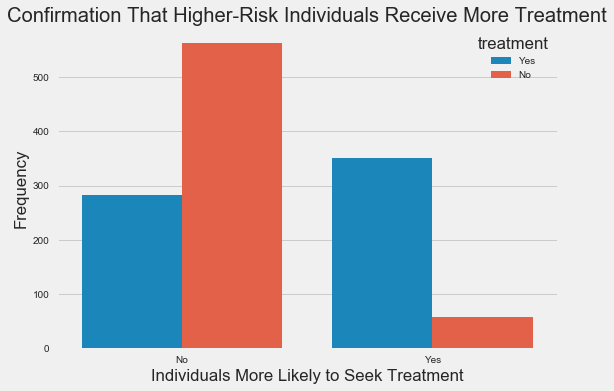

In [360]:
sns.countplot(df.MoreLikely, hue = df.treatment)
plt.title('Confirmation That Higher-Risk Individuals Receive More Treatment')
plt.xlabel('Individuals More Likely to Seek Treatment')
plt.ylabel('Frequency')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show()

The above plot confirms that those who are coded as 1 in the MoreLikely variable are in fact more likely to seek treatment. 

### 3.2 - "ProblematicWork"
An individual's workplace can exacerbate one's mental health issues, especially if they feel like they can't seek treatment for fear of how the stigma could affect their employment. In other words, one's workplace can be problematic in affecting whether they seek treament. 

We will create a new variable, ProblematicWork based on four existing variables: leave, mental_health_consequences, obs_consequence, and benefits. If the response to these questions is negative in 2 or more, we will mark ProblematicWork as 1. 

The negative responses are as follows: 

leave: Very difficult

mental_health_consequence: Yes

obs_consequence: Yes

benefits: No

In [361]:
# Initialize the column 
ProblematicWork = np.repeat(a=np.nan, repeats=len(df))

# Initialize the loop
for i in range(len(df)):
    # Make a counter to determine number of variables are negative
    counter = 0
    if (df.leave.values[i]=='Very difficult'):
        counter = counter+1
    if (df.mental_health_consequence.values[i]=='Yes'):
         counter = counter+1
    if (df.obs_consequence.values[i]=='Yes'):
        counter = counter+1
    if (df.benefits.values[i]=='No'):
         counter = counter+1
    # Assign to ProblematicWork
    ProblematicWork[i] = counter
    
# Now recode the variable - >=2 is 1
ProblematicWork[ProblematicWork<2] = 0
ProblematicWork[ProblematicWork>=2] = 1

# Create the variable 
df['ProblematicWork'] = ProblematicWork

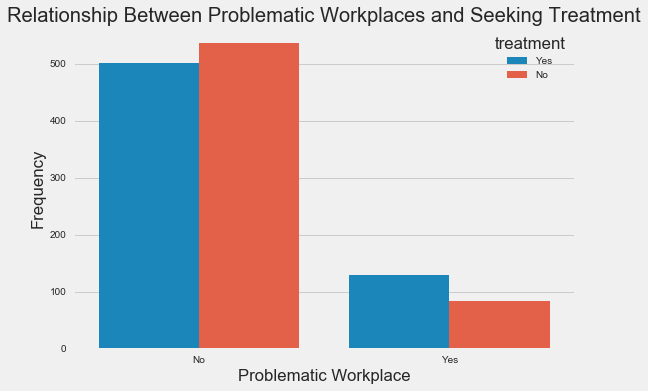

In [362]:
sns.countplot(df.ProblematicWork, hue = df.treatment)
plt.title('Relationship Between Problematic Workplaces and Seeking Treatment')
plt.ylabel('Frequency')
plt.xlabel('Problematic Workplace')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show()

Those who work in a problematic workplace are more likely to seek treatment, but not substantially more likely. This may not be a great predictor, as those who don't work in a problematic workplace still seek treatment at nearly-equal rates. However, we'll include this variable anyway. 

### 3.3 - "WorkplaceSupport"

Someone who is comfortable speaking to someone from work has some workplace support, potentially making them more likely to seek treatment. So we'll make this column based on three existing variables: coworkers, mental_vs_physical, and supervisor. If the answer is positive in two of these columns, we'll mark WorkplaceSupport as 1. 

The positive responses are as follows: 

coworkers: Some of them, Yes

supervisor: Some of them, Yes

mental_vs_physical: Yes

In [363]:
df.mental_vs_physical.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [364]:
# Initialize the column 
WorkPlaceSupport = np.repeat(a=np.nan, repeats=len(df))

# Initialize the loop
for i in range(len(df)):
    # Make a counter to determine number of variables are negative
    counter = 0
    if (df.coworkers.values[i]!='No'):
        counter = counter+1
    if (df.supervisor.values[i]!='No'):
         counter = counter+1
    if (df.mental_vs_physical.values[i]=='Yes'):
        counter = counter+1
    # Assign to ProblematicWork
    WorkPlaceSupport[i] = counter
    
# Now recode the variable - >=2 is 1
WorkPlaceSupport[WorkPlaceSupport<=1] = 0
WorkPlaceSupport[WorkPlaceSupport>1] = 1

# Create the variable 
df['WorkPlaceSupport'] = WorkPlaceSupport

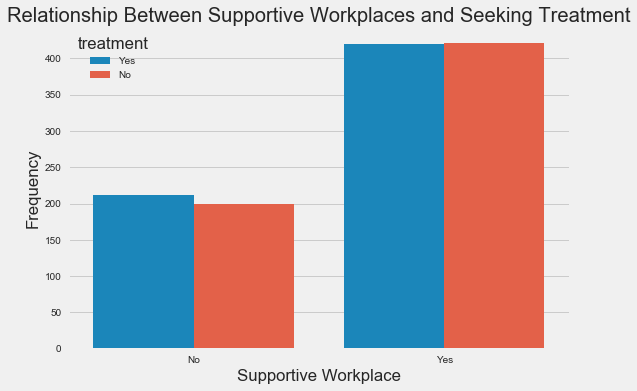

In [365]:
sns.countplot(df.WorkPlaceSupport, hue = df.treatment)
plt.title('Relationship Between Supportive Workplaces and Seeking Treatment')
plt.xlabel('Supportive Workplace')
plt.ylabel('Frequency')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show()

It appears as though having support at one's work place does not influence seeking treatment dramatically. Therefore, it does not make sense to include this variable. We will drop it. 

In [366]:
df.drop('WorkPlaceSupport', axis = 1, inplace = True)

### 2.4 - "Hour" 

We'll extract the hour of the response. This could potentially be useful for cross-validation. 

In [367]:
df.Timestamp = pd.to_datetime(df.Timestamp,infer_datetime_format=True)
df['Hour'] = df.Timestamp.dt.hour
print(np.sort(df.Hour.unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


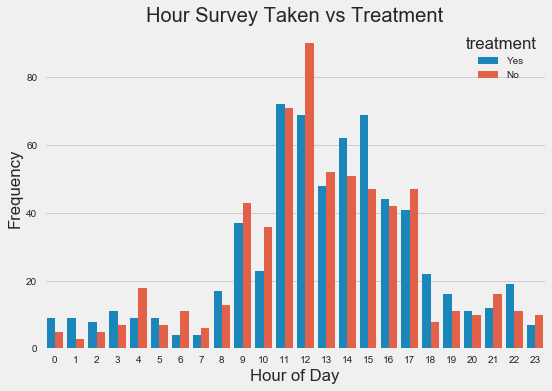

In [368]:
sns.countplot(df.Hour, hue = df.treatment)
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Hour Survey Taken vs Treatment')
plt.show()

We can observe that individuals who are up in the very early hours of the morning (midnight - 3 am) typically seek treatment at higher frequencies. There may be a relationship here. 

# Part Three: Data Modeling

### Step 1. Preprocessing

First let's observe the columns again to confirm that our dataframe only contains columns we want. 

In [38]:
df.columns.values

array(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Hour',
       'MoreLikely', 'ProblematicWork'], dtype=object)

Let's remove Timestamp. 

In [39]:
df.drop('Timestamp', axis = 1, inplace = True)

Before proceeding with our modeling, we need to preprocess our data and load all the libraries and functions we'll need. 

In [176]:
import sklearn
# Import models we'll employ 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Function for splitting training and test set
from sklearn.model_selection import train_test_split
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV
# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, recall_score, precision_score

SKLearn requires a sparse matrix format for our data, so we need to convert our categorical variables into dummy variables. However, there are a few variables that just have two classes, so we can convert them to binary. Let's figure out which those are. 

In [41]:
for col in df.dtypes[df.dtypes==np.object].index.values:
    if(len(df[col].unique())<=2):
        print(col)
        print(df[col].unique())

self_employed
['No' 'Yes']
family_history
['No' 'Yes']
treatment
['Yes' 'No']
tech_company
['Yes' 'No']
obs_consequence
['No' 'Yes']


In [42]:
for col in ['self_employed', 'family_history', 'treatment', 'tech_company', 'obs_consequence']:
    df[col].replace(to_replace = ['No', 'Yes'], value = [0, 1], inplace = True)

Finally, let's take care of the rest of the categorical variables. 

In [44]:
df2 = pd.get_dummies(df, df.dtypes[df.dtypes==np.object].index.values, drop_first=True)
df2.head()

,Age,self_employed,family_history,treatment,tech_company,obs_consequence,comments,Hour,MoreLikely,ProblematicWork,...,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes
0,37,0,0,1,1,0,0,11,0.0,0.0,...,1,0,0,1,1,0,0,0,0,1
1,44,0,0,0,0,0,0,11,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
2,32,0,0,0,1,0,0,11,0.0,0.0,...,0,1,0,1,0,1,0,1,1,0
3,31,0,1,1,1,1,0,11,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
4,31,0,0,0,1,0,0,11,0.0,0.0,...,1,0,0,1,0,1,0,1,0,0


Now we can split our data into a train set and test set - we'll hold out 20% of the data to test. We'll also stratify to maintain the same proportion of yes and no in our train and test datasets. 

In [45]:
y = df2.treatment
X = df2.drop('treatment', axis = 1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 1234, 
                                                    stratify = df2.treatment)

## Step 2. Building Model Pipelines

We'll create a dictionary which contains the preprocessing pipelines for our models. 

In [251]:
pipelines = {
    'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)),
    'l2': make_pipeline(StandardScaler(), LogisticRegression(random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123)),
    'knn': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'lda': LinearDiscriminantAnalysis() # Wasn't working before with StandardScaler
}

### Step 3. Declare Hyperparameters to Tune

We'll make use of the sklearn's grid search cross validation to find the optimal hyperparameters. We'll declare them in dictionaries below. 

** Logistic Regression **

In [132]:
l1_hyperparams = {
    'logisticregression__C': np.linspace(1e-3, 1e3, 10)
}
l2_hyperparams = {
    'logisticregression__C': np.linspace(1e-3, 1e3, 10)
}

**Random Forest**

In [133]:
rf_hyperparams = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', .33]
}

**Boosted Tree**

In [134]:
gb_hyperparams = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [.05, .1, .2], 
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

**KNN**

In [135]:
knn_hyperparams = {
    'kneighborsclassifier__n_neighbors': np.arange(1,50),
    'kneighborsclassifier__leaf_size': np.arange(1,40,5)
}

**LDA**

In [136]:
lda_hyperparams = {}

Now we can create our hyperparameters dictionary. 

In [137]:
# Create hyperparameters dictionary
hyperparameters = {
    'l1': l1_hyperparams,
    'l2': l2_hyperparams,
    'rf': rf_hyperparams,
    'gb': gb_hyperparams,
    'knn': knn_hyperparams,
    'lda': lda_hyperparams
}

## Step 4. Fit and Tune Models with Cross-Validation

In [138]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1)
    
    # Fit model on X_train, y_train
    model.fit(X = X_train, y = y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print('{} has been fitted'.format(name))


knn has been fitted
lda has been fitted
rf has been fitted
l2 has been fitted
gb has been fitted
l1 has been fitted


In [139]:
# Display best_score_ for each fitted model
for model in fitted_models:
    print(model, fitted_models[model].best_score_)

('knn', 0.73426573426573427)
('lda', 0.83116883116883122)
('rf', 0.8221778221778222)
('l2', 0.82817182817182822)
('gb', 0.83916083916083917)
('l1', 0.82817182817182822)


Based on the best_score attribute from each fitted model, it appears that a gradient boosted tree is our best option. Let's check the area under the ROC curve for each model and how well they predict our test data before selecting a model. 

## Step 5. Model Selection 

In [290]:
# Code here
for model in fitted_models:
    #create class probabilities
    pred = fitted_models[model].predict_proba(X_test)
    pred = [Class[1] for Class in pred]
    
    #create fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    
    #calculate auc
    mod_auc = auc(fpr, tpr)
    print(model, mod_auc)
    
print('\n')    
for model in fitted_models: 
    print(model, fitted_models[model].best_score_)

knn 0.823818897638
lda 0.901447802896
rf 0.890906781814
l2 0.89712979426
gb 0.904368808738
l1 0.89712979426


knn 0.734265734266
lda 0.831168831169
rf 0.822177822178
l2 0.828171828172
gb 0.839160839161
l1 0.828171828172


The gradient boosted tree had the highest area under the ROC curve, and the best_score attribute. LDA is not far behind. Let's visualize the ROC curves for both. 

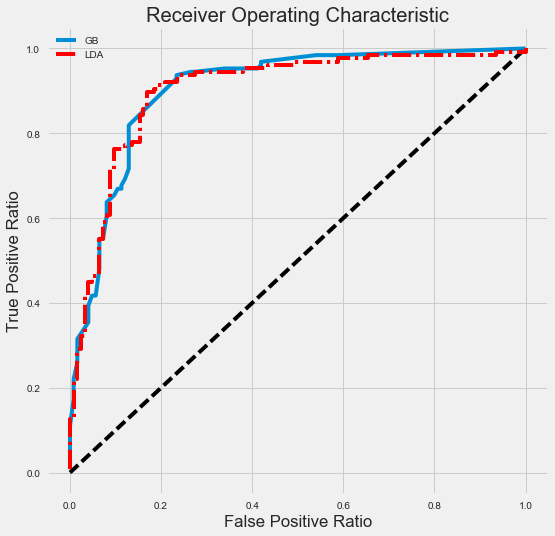

In [195]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred = fitted_models['gb'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [Class[1] for Class in pred]

# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=pred)

# Predict PROBABILITIES using L1-regularized logistic regression
pred2 = fitted_models['lda'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred2 = [Class[1] for Class in pred2]

# Calculate ROC curve from y_test and pred
fpr2, tpr2, thresholds2 = roc_curve(y_true=y_test, y_score=pred2)

# Initialize figure
figure = plt.figure(figsize=(8,8), edgecolor='red')
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label = 'GB')

# Diagonal 45 degree line
plt.plot([0,1], [0,1], 'k--')

# ROC curve of LDA
plt.plot(fpr2, tpr2, label = 'LDA', color = 'red', linestyle = '-.')
plt.legend(loc = 'upper left')

# Axes limits and labels
plt.ylabel('True Positive Ratio')
plt.xlabel('False Positive Ratio')
plt.show()

We can observe how these models predicted whether or not an individual sought treatment. 

In [177]:
from __future__ import print_function
pred = fitted_models['gb'].predict(X_test)
print(confusion_matrix(y_pred=pred, y_true=y_test))

[[ 95  29]
 [  9 118]]


From the confusion matrix, we can calculate important metrics for our model - specifically, accuracy, recall, and precision. 

In [186]:
print('The model predicted ', np.round(accuracy_score(y_true=y_test, y_pred=pred)*100,2), 
      '% of the test data correctly.', sep = '')
print('The model predicted ', np.round(recall_score(y_pred=pred, y_true=y_test)*100, 2), 
      '% of all actual individuals who sought treatment.', sep = '')
print('The model predicted that an individual sought treatment correctly ', 
      np.round(precision_score(y_true=y_test, y_pred=pred)*100, 2), '% of the time', sep = '')

The model predicted 84.86% of the test data correctly.
The model predicted 92.91% of all actual individuals who sought treatment.
The model predicted that an individual sought treatment correctly 80.27% of the time


It's important to consider what metric would be the most important for us to maximize in order to select our final model. 

A company would want to predict if an employee seeks mental health treatment to try and maximize productivity from an employee and to determine how work should be allocated to an employee. However, a company does not want to allocate resources improperly for an employee that does not seek treatment for mental health. Therefore, they want to try and maximize the amount of time they properly predict an individual seeking mental health treatment - the precision score. 

We'll run a loop to see which model maximized precision, and that will be our selected model. 

In [191]:
for model in fitted_models:
    #create class predictions
    pred = fitted_models[model].predict(X_test)
    
    #calculate precision
    precision = precision_score(y_true=y_test, y_pred=pred)
    print(confusion_matrix(y_pred=pred, y_true=y_test))
    print(model, precision)

[[110  14]
 [ 62  65]]
knn 0.822784810127
[[ 96  28]
 [ 10 117]]
lda 0.806896551724
[[100  24]
 [ 23 104]]
rf 0.8125
[[ 99  25]
 [ 17 110]]
l2 0.814814814815
[[ 95  29]
 [  9 118]]
gb 0.802721088435
[[ 99  25]
 [ 17 110]]
l1 0.814814814815


The output above indicates that KNN has the highest precision, but the confusion matrix has us concerned. We can compromise by selecting the model with the second-largest precision (either logistic regression models), since it increases other metrics without much of a decrease in precision. 

We can visualize this improvement with the ROC curve. The plot below compares KNN with L2 Logistic Regression. 

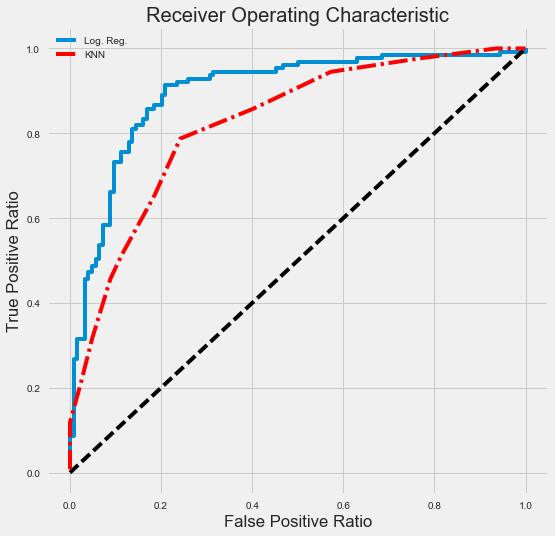

In [197]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred = fitted_models['l2'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [Class[1] for Class in pred]

# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=pred)

# Predict PROBABILITIES using L1-regularized logistic regression
pred2 = fitted_models['knn'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred2 = [Class[1] for Class in pred2]

# Calculate ROC curve from y_test and pred
fpr2, tpr2, thresholds2 = roc_curve(y_true=y_test, y_score=pred2)

# Initialize figure
figure = plt.figure(figsize=(8,8), edgecolor='red')
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label = 'Log. Reg.')

# Diagonal 45 degree line
plt.plot([0,1], [0,1], 'k--')

# ROC curve of LDA
plt.plot(fpr2, tpr2, label = 'KNN', color = 'red', linestyle = '-.')
plt.legend(loc = 'upper left')

# Axes limits and labels
plt.ylabel('True Positive Ratio')
plt.xlabel('False Positive Ratio')
plt.show()

Finally, given that we have chosen Logistic Regression as our model, we can view the coefficients to interpret how the model makes its predictions. 

In [370]:
lg = LogisticRegression(C=111.11200000000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=123,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
lg = lg.fit(X_train, y_train)
coefs = lg.coef_.reshape((50,))
coef_df = pd.DataFrame({'Predictor': X_train.columns.values, 'Coefficients': coefs, 'Odds': np.exp(coefs), 'Probability':(np.exp(coefs)/(1+np.exp(coefs)))})
coef_df.sort_values(by = ['Odds'], ascending=False)

,Coefficients,Odds,Predictor,Probability
14,4.491613,89.265336,work_interfere_Often,0.988922
16,3.967984,52.877828,work_interfere_Sometimes,0.981439
15,3.583889,36.013320,work_interfere_Rarely,0.972983
2,1.635083,5.129886,family_history,0.836865
12,1.137047,3.117547,Country_United Kingdom,0.757137
41,1.072678,2.923197,coworkers_Yes,0.745106
25,0.791776,2.207314,care_options_Yes,0.688213
45,0.742974,2.102179,mental_health_interview_Yes,0.677646
23,0.628915,1.875574,benefits_Yes,0.652243
4,0.596114,1.815051,obs_consequence,0.644767


Work_Interfere had extremely high odds, yielding >97 percent probability of seeking treatment. 

Family_History also had very high odds, with ~84 percent probability of seeking treatment.

Coworkers, Care_Options, Benefits, Mental_Health_Interview and Obs_Consequence also had high odds (more than 80 percent likely) and probabilities > 60 percent.

# Conclusions

The data and models reveal great in

Employees are more likely to seek treatment when:
    
    Mental health issues interfere with work. 
    
    Mental health issues are present with family history. 

Employers can help their employees get the necessary treatment by:
    
    Providing mental health care benefits. 
    
    Making employees aware of these benefits. 
    
    Creating an environment where coworkers can discuss mental health. 
    
    Creating an environment without a perceived consequence of coming forward with a mental health issue. 


### Links to slides and video: 

Slides: https://docs.google.com/presentation/d/1AIjaEBLNEuUs9TPWKHgcgZaBj5AZBI7UBWKxZZ7PjUI/edit?usp=sharing

Video: https://www.youtube.com/watch?v=H5VwxesHpxc